In [583]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import time
from config import api_key
import pprint as pp
from collections import Counter
import seaborn as sns
%matplotlib inline

In [ ]:
#Function Snip For Future Use
#_2010_2020_ = dfx.loc[(dfx['release_date'] > '2010-01-01') & (dfx['release_date'] < '2020-01-01'), ['title', 'release_date', 'revenue', 'budget']]


In [584]:
###Import dfx.csv file created earlier in Notebook
dfx = pd.read_csv('dfx_movies.csv')
dfx.head()
dfx.shape

,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,overview,production_companies,production_countries,vote_average,vote_count,all_companies
0,0,19995,tt0499549,Avatar,2009-12-10,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2787965087,237000000,162,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'id': 289, 'logo_path': None, 'name': 'Ingen...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18071,"['Ingenious Film Partners', 'Dune Entertainmen..."
1,1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2068223624,245000000,136,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'id': 1634, 'logo_path': None, 'name': 'True...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12283,"['Truenorth Productions', 'Lucasfilm', 'Bad Ro..."
2,2,299536,tt4154756,Avengers: Infinity War,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,300000000,149,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12316,['Marvel Studios']
3,3,597,tt0120338,Titanic,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1845034188,200000000,194,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13645,"['Paramount', 'Lightstorm Entertainment', '20t..."
4,4,135397,tt0369610,Jurassic World,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1671713208,150000000,124,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'id': 3341, 'logo_path': '/dTG5dXE1kU2mpmL9B...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13645,"['Fuji Television Network', 'Amblin Entertainm..."


(4000, 16)

In [585]:
#Drop Additonal Unnecessary Columns
dfx.drop(columns=['Unnamed: 0', 'production_companies', 'genres'])

,id,imdb_id,title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_companies
0,19995,tt0499549,Avatar,2009-12-10,2787965087,237000000,162,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18071,"['Ingenious Film Partners', 'Dune Entertainmen..."
1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,2068223624,245000000,136,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12283,"['Truenorth Productions', 'Lucasfilm', 'Bad Ro..."
2,299536,tt4154756,Avengers: Infinity War,2018-04-25,2046239637,300000000,149,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12316,['Marvel Studios']
3,597,tt0120338,Titanic,1997-11-18,1845034188,200000000,194,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13645,"['Paramount', 'Lightstorm Entertainment', '20t..."
4,135397,tt0369610,Jurassic World,2015-06-06,1671713208,150000000,124,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13645,"['Fuji Television Network', 'Amblin Entertainm..."
5,24428,tt0848228,The Avengers,2012-04-25,1519557910,220000000,143,Some assembly required.,When an unexpected enemy emerges and threatens...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.6,18576,['Marvel Studios']
6,168259,tt2820852,Furious 7,2015-04-01,1506249360,190000000,137,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,6317,"['Abu Dhabi Film Commission', 'Universal Pictu..."
7,99861,tt2395427,Avengers: Age of Ultron,2015-04-22,1405403694,280000000,141,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,12535,['Marvel Studios']
8,284054,tt1825683,Black Panther,2018-02-13,1346739107,200000000,134,Long live the king.,King T'Challa returns home from America to the...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,11347,"['Marvel Studios', 'Walt Disney Pictures']"
9,12445,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1342000000,125000000,130,It all ends here.,"Harry, Ron and Hermione continue their quest t...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",8.1,11060,"['Warner Bros. Pictures', 'Heyday Films']"


In [586]:
#Replace '0' Values in Revenue & Budget with nan
dfx_cols = ['revenue', 'budget']
dfx[dfx_cols] = dfx[dfx_cols].replace(0, np.nan)

In [587]:
#Drop rows with nan Values in Revenue & Budget
dfx.dropna(subset = dfx_cols, inplace=True)
dfx.shape

(3566, 16)

In [588]:
#Set Revenue & Budget as 
dfx['revenue'] = dfx['revenue'] / 1000000
dfx['budget'] = dfx['budget'] / 1000000

In [589]:
#Clean up Production Cos
dfx['all_companies'] = dfx['all_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['all_companies'] = dfx['all_companies'].str.split(',')

In [590]:
all_cos = []

for row in dfx['all_companies']:
    for co in row:
        all_cos.append(co)

all_cos

['IngeniousFilmPartners',
 'DuneEntertainment',
 'LightstormEntertainment',
 '20thCenturyFox',
 'TruenorthProductions',
 'Lucasfilm',
 'BadRobot',
 'MarvelStudios',
 'Paramount',
 'LightstormEntertainment',
 '20thCenturyFox',
 'FujiTelevisionNetwork',
 'AmblinEntertainment',
 'LegendaryEntertainment',
 'UniversalPictures',
 'Dentsu',
 'TheKennedy/MarshallCompany',
 'MarvelStudios',
 'AbuDhabiFilmCommission',
 'UniversalPictures',
 'ChinaFilmCo.',
 'OriginalFilm',
 'FujiTelevisionNetwork',
 'QuébecProductionServicesTaxCredit',
 'ColoradoOfficeofFilm',
 'Television&Media',
 'Dentsu',
 'MediaRightsCapital',
 'OneRace',
 'MarvelStudios',
 'MarvelStudios',
 'WaltDisneyPictures',
 'WarnerBros.Pictures',
 'HeydayFilms',
 'Lucasfilm',
 'WaltDisneyPictures',
 'RamBergmanProductions',
 'FormulaFilm',
 'TruenorthProductions',
 'JucumariFilms',
 'AmblinEntertainment',
 'LegendaryEntertainment',
 'UniversalPictures',
 'PerfectWorldPictures',
 'WaltDisneyPictures',
 'WaltDisneyAnimationStudios',
 'W

In [591]:
#Count & Sort Production Companies
prod_appearances = Counter(all_cos)
prod_sorted = sorted(zip(prod_appearances.values(), prod_appearances.keys()), reverse=True)
prod_sorted[:10]

[(335, 'WarnerBros.Pictures'),
 (332, 'UniversalPictures'),
 (261, 'ColumbiaPictures'),
 (234, 'Paramount'),
 (224, '20thCenturyFox'),
 (173, 'NewLineCinema'),
 (136, 'WaltDisneyPictures'),
 (116, 'TouchstonePictures'),
 (113, 'RelativityMedia'),
 (98, 'DreamWorks')]

In [592]:
#Convert Release Dates to datetime and Make Release Year column
dfx.release_date = pd.to_datetime(dfx['release_date'])
dfx['release_year'] = dfx['release_date'].dt.year

In [603]:
#Add Multiple Column (Revenue / Budget)
dfx['multiple'] = dfx['revenue'] / dfx['budget']
dfx.sort_values('multiple', ascending=False).head(10)

,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,overview,production_companies,production_countries,vote_average,vote_count,all_companies,release_year,is_us,multiple
533,533,2667,tt0185937,The Blair Witch Project,1999-07-14,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",248.000000,0.060,81,The scariest movie of all time is a true story.,In October of 1994 three student filmmakers di...,"[{'id': 15160, 'logo_path': None, 'name': 'Hax...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",6.3,2079,"[HaxanFilms, ArtisanEntertainment]",1999,True,4133.333333
2743,2743,9372,tt0390521,Super Size Me,2004-01-17,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",28.575078,0.065,100,The first ever reality-based movie ... everyth...,Morgan Spurlock subjects himself to a diet bas...,"[{'id': 8735, 'logo_path': None, 'name': 'Kath...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",6.7,821,"[KathburPictures, SamuelGoldwynFilms, TheCon, ...",2004,True,439.616585
2293,2293,299245,tt2309260,The Gallows,2015-07-10,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",42.664410,0.100,87,Every School Has Its Spirit,20 years after a horrific accident during a sm...,"[{'id': 69581, 'logo_path': None, 'name': 'Tre...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",4.8,565,"[TremendumPictures, NewLineCinema, BlumhousePr...",2015,True,426.644100
2033,2033,83,tt0374102,Open Water,2003-12-29,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",54.667954,0.130,79,Scream all you want.,Two divers are left out at sea without a boat....,"[{'id': 22376, 'logo_path': None, 'name': 'Plu...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",5.4,557,[PlungePicturesLLC],2003,True,420.522723
3059,3059,538831,tt5747714,Unbound,2018-06-15,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",21.000000,0.080,97,Love will make you do evil things.,"Set in a sleepy town in New Orleans, a family ...","[{'id': 107123, 'logo_path': None, 'name': 'Ra...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",0.0,0,[RahamanStudios],2018,True,262.500000
2215,2215,8193,tt0374900,Napoleon Dynamite,2004-06-11,"[{'id': 35, 'name': 'Comedy'}]",46.118097,0.400,95,He's out to prove he's got nothing to prove.,A listless and alienated teenager decides to h...,"[{'id': 746, 'logo_path': '/kc7bdIVTBkJYy9aDK1...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",6.8,885,"[MTVFilms, AccessFilms, NapoleonPicturesLimite...",2004,True,115.295242
3772,3772,18925,tt0805526,Facing the Giants,2006-09-29,"[{'id': 18, 'name': 'Drama'}]",10.178331,0.100,111,Never give up. Never back down. Never lose faith.,A losing coach with an underdog football team ...,"[{'id': 769, 'logo_path': None, 'name': 'Desti...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",7.0,132,[DestinationFilms],2006,True,101.783310
1344,1344,76487,tt1560985,The Devil Inside,2012-01-06,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",101.758490,1.000,83,No soul is safe.,"In Italy, a woman becomes involved in a series...","[{'id': 6302, 'logo_path': None, 'name': 'Room...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",4.7,426,"[Room101, Prototype]",2012,True,101.758490
3236,3236,193612,tt2235779,The Quiet Ones,2014-04-01,"[{'id': 27, 'name': 'Horror'}]",17.834867,0.200,98,A shocking experiment. An unspeakable evil.,A university student and some classmates are r...,"[{'id': 1314, 'logo_path': '/gQBluDqe6dc2ZdzfJ...","[{iso_3166_1:GB, name:UnitedKingdom}, {iso_316...",5.0,385,"[HammerFilmProductions, ExclusiveMedia, Travel...",2014,True,89.174335
1316,1316,176,tt0387564,Saw,2004-10-01,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",103.911669,1.200,103,Live or die. Make your choice.,Obsessed with teaching his victims the value o...,"[{'id': 2061, 'logo_path': None, 'name': 'Twis...","[{iso_3166_1:US, name:UnitedStatesofAmerica}]",7.4,4609,"[TwistedPictures, EvolutionEntertainment, SawP...",2004,True,86.593058


In [604]:
#Drop Karate Kid (Budget Outlier)
dfx.drop(dfx.loc[dfx['id'] == 8856.0].index, inplace=True)
#Drop Star Wars Trilogy
dfx.drop(dfx.loc[dfx['id'] == 570421.0].index, inplace=True)

In [605]:
#Drop Outlier Paranormal Activity
dfx.drop(dfx.loc[dfx['id'] == 23827.0].index, inplace=True)

In [606]:
#Drop Outlier Nurse 3D
dfx.drop(dfx.loc[dfx['id'] == 78383.0].index, inplace=True)

In [625]:
#Function to Filter Out Non-US Production Countries

dfx['production_countries'] = dfx['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['production_countries'] = dfx['production_countries'].str.split(',')

prod_country = 'US'

country_list = []

for i in range(len(dfx)):
    for item in dfx.iloc[i]['production_countries']:
        if prod_country in item:
            country_list.append(dfx.iloc[i]['title'])
            #print(dfx.iloc[i]['production_countries'], '-->', dfx.iloc[i]['title'])

#Create Column if US
def country_check(row):
    if row['title'] in country_list:
        val = True
    else:
        val = False
    
    return val

dfx['is_us'] = dfx.apply(country_check, axis=1)
dfx = dfx[dfx['is_us']]

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [608]:
df = dfx.copy(deep=True)
df.shape

(3125, 19)

In [626]:
#Create boolean columns for the major studios & lionsgate competitors
production_comps = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']

for comp in production_comps:
    
    comp_list = []
    
    for i in range(len(dfx)):
        for item in dfx.iloc[i]['all_companies']:
            if comp in item.lower():
                comp_list.append(dfx.iloc[i]['title'])
                #print(dfx.iloc[i]['all_production_cos'], '-->', dfx.iloc[i]['title'])

    def comp_func(row):
        if row['title'] in comp_list:
            val = True
        else:
            val = False

        return val


    df[comp] = df.apply(comp_func, axis=1)
    

In [627]:
all_lions_gate = df.loc[(df['lions'] == True)].groupby('release_year')['revenue', 'budget'].sum()

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x = all_lions_gate.index.tolist(),
    y = all_lions_gate['budget'],
    name='Budget'
)
trace2 = go.Bar(
    x = all_lions_gate.index.tolist(),
    y = all_lions_gate['revenue'],
    name='Revenue'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



(Text(0.5, 0, 'budget'), Text(0, 0.5, 'revenue'))

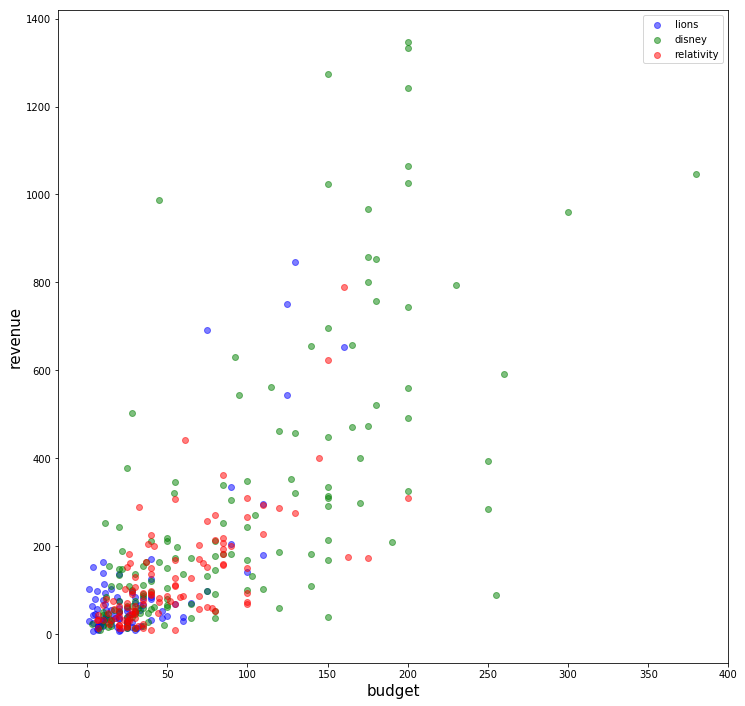

In [635]:
comp_to_map = ['lions', 'disney', 'relativity']

from itertools import cycle
cycol = cycle('bgrcmk')

def get_x_vals(company):
    x = df[df[company] == True]['budget']
    return x

def get_y_vals(company):
    y = df[df[company] == True]['revenue']
    return y

def get_z_vals(company):
    z = df[df[company] == True]['multiple']
    return z

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)


for co in comp_to_map:
    ax.scatter(get_x_vals(co), get_y_vals(co), label=co, alpha=0.5, c=next(cycol))
        
ax.set_xlabel('budget', fontsize=15), ax.set_ylabel('revenue', fontsize=15)
#ax.grid(True)
ax.legend()
plt.show()


In [611]:
df.groupby('release_year')['multiple', 'revenue'].aggregate(['count', min, max, 'mean']).sort_values('release_year', ascending=False).head(20)

multiple                                 revenue             \
                count       min         max      mean   count        min   
release_year                                                               
2019                9  0.980214   12.188263  4.176021       9  17.643857   
2018              112  0.306250  262.500000  6.946971     112   9.602624   
2017              114  0.285811   56.670518  4.887885     114   8.574339   
2016              146  0.157009   30.381395  3.793217     146   8.810591   
2015              119  0.253613  426.644100  8.466594     119   8.235661   
2014              133  0.280514   89.174335  5.308987     133  10.076790   
2013              126  0.172542   29.776209  3.576914     126   7.972967   
2012              120  0.351373  101.758490  4.820833     120   8.138788   
2011              136  0.259952   41.140764  3.475160     136   8.000000   
2010              126  0.224234   64.672767  4.286477     126   7.871522   
2009              134  0.255284   33.529412  3.293062     134   7.875862   
2008              132  0.207196   66.912634  3.419447     132   8.049666   
2007              126  0.167137   30.854878  3.204383     126   7.938872   
2006              148  0.165426  101.783310  3.836907     148   8.059140   
2005              132  0.127081   38.231273  3.018871     132   8.342132   
2004              119  0.178069  439.616585  8.267414     119   8.112712   
2003              109  0.230785  420.522723  7.671061     109   7.808524   
2002              121  0.212347   73.748809  3.437680     121   8.493890   
2001              110  0.181292   15.410302  2.808878     110  10.013424   
2000              102  0.164756   14.632620  2.526696     102   8.279017   

                                       
                      max        mean  
release_year                           
2019           910.298835  245.471069  
2018          2046.239637  213.053599  
2017          1332.459537  225.215451  
2016          1153.304495  182.279479  
2015          2068.223624  215.544608  
2014          1091.405097  184.418182  
2013          1274.219009  187.275408  
2012          1519.557910  197.363310  
2011          1342.000000  163.123302  
2010          1066.969703  170.562476  
2009          2787.965087  162.244097  
2008          1004.558444  136.537320  
2007           961.000000  144.276677  
2006          1065.659812  112.968160  
2005           895.921036  115.425327  
2004           919.838758  130.564786  
2003          1118.888979  139.720937  
2002           926.287400  122.333090  
2001           976.475550  121.744086  
2000           546.388105  109.084310

In [612]:
zzz = df.groupby('release_year')['revenue', 'budget'].sum()
zzz['revenue']

release_year
1989     4893.558044
1990     5358.670893
1991     4643.471193
1992     5362.443589
1993     6094.491149
1994     7137.054769
1995     7793.039168
1996     7875.213679
1997    10751.746981
1998    10030.525012
1999    11912.027856
2000    11126.599612
2001    13391.849468
2002    14802.303832
2003    15229.582162
2004    15537.209506
2005    15236.143168
2006    16719.287685
2007    18178.861364
2008    18022.926230
2009    21740.708941
2010    21490.871975
2011    22184.769012
2012    23683.597206
2013    23596.701352
2014    24527.618192
2015    25649.808405
2016    26612.803994
2017    25674.561438
2018    23862.003062
2019     2209.239622
Name: revenue, dtype: float64

In [564]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x = zzz.index.tolist(),
    y = zzz['budget'],
    name='Budget'
)
trace2 = go.Bar(
    x = zzz.index.tolist(),
    y = zzz['revenue'],
    name='Revenue'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [614]:
df.loc[(df['lion'] == True)].groupby('release_year')['revenue', 'budget'].sum().sort_values('release_year', ascending=False)

,revenue,budget
release_year,,
2018,186.802506,173.50
2017,380.045078,173.00
2016,1029.385255,380.50
2015,1196.788002,408.30
2014,1089.813365,320.00
2013,909.172691,197.00
2012,877.138696,157.00
2011,243.770801,125.00
2010,537.457090,221.00


In [615]:
df.loc[(df['lion'] == True)].sort_values('revenue', ascending=False)


,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,...,columbia,pixar,marvel,warner,paramount,fox,universal,newline,dreamworks,relativity
66,66,101299,tt1951264,The Hunger Games: Catching Fire,2013-11-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",847.423452,130.00,146,Every revolution begins with a spark.,...,False,False,False,False,False,False,False,False,False,False
90,90,131631,tt1951265,The Hunger Games: Mockingjay - Part 1,2014-11-18,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",752.100229,125.00,123,Fire burns brighter in the darkness,...,False,False,False,False,False,False,False,False,False,False
110,110,70160,tt1392170,The Hunger Games,2012-03-12,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",691.210692,75.00,142,May The Odds Be Ever In Your Favor.,...,False,False,False,False,False,False,False,False,False,False
122,122,131634,tt1951266,The Hunger Games: Mockingjay - Part 2,2015-11-18,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",653.428261,160.00,137,The fire will burn forever.,...,False,False,False,False,False,False,False,False,False,False
166,166,435,tt0319262,The Day After Tomorrow,2004-05-26,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",544.272402,125.00,124,Where will you be?,...,False,False,False,False,False,True,False,False,False,False
364,364,291805,tt3110958,Now You See Me 2,2016-06-02,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",334.901337,90.00,129,You Haven't Seen Anything Yet,...,False,False,False,False,False,False,False,False,False,False
435,435,262500,tt2908446,Insurgent,2015-03-18,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",295.238201,110.00,119,One Choice Can Destroy You,...,False,False,False,False,False,False,False,False,False,False
667,667,138103,tt2333784,The Expendables 3,2014-08-04,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206.172544,90.00,127,New team. New attitude. New mission.,...,False,False,False,False,False,False,False,False,False,False
772,772,262504,tt3410834,Allegiant,2016-03-09,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",179.246868,110.00,121,Break the boundaries of your world,...,False,False,False,False,False,False,False,False,False,False
824,824,324552,tt4425200,John Wick: Chapter 2,2017-02-08,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",171.539887,40.00,122,Never stab the devil in the back,...,False,False,False,False,False,False,False,False,False,False


In [617]:
list_of_cos = []
var = 'multiple'

lions_dict = {'name': 'lion', 
              'count': df.loc[(df['lion'] == True)][var].count(), 
              'mean': df.loc[(df['lion'] == True)][var].mean(),
              'median': df.loc[(df['lion'] == True)][var].median(),
              'min': df.loc[(df['lion'] == True)][var].min(),
              'max': df.loc[(df['lion'] == True)][var].max(),
              'std': df.loc[(df['lion'] == True)][var].std()
             }
lions_dict
#df_summary = pd.DataFrame({'lion': df.groupby('lions')['multiple'].describe()})

{'name': 'lion',
 'count': 103,
 'mean': 4.865784374789977,
 'median': 2.3453472857142854,
 'min': 0.33410510000000004,
 'max': 86.5930575,
 'std': 9.712175456099281}

In [619]:
prod_cos = ['lion', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
list_of_cos = []
var = 'multiple'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    list_of_cos.append(pco_dict)
    
list_of_cos[0]

{'name': 'lion',
 'count': 103,
 'mean': 4.865784374789977,
 'median': 2.3453472857142854,
 'min': 0.33410510000000004,
 'max': 86.5930575,
 'std': 9.712175456099281}

In [620]:
company_df = pd.DataFrame(list_of_cos)

In [621]:
company_df

,count,max,mean,median,min,name,std
0,103,86.593058,4.865784,2.345347,0.334105,lion,9.712175
1,145,22.991743,3.578983,2.634837,0.259952,disney,3.482423
2,267,26.131792,2.910695,2.236285,0.171834,columbia,2.680330
3,20,12.451801,4.877721,4.387500,1.896721,pixar,2.566462
4,52,13.501724,3.912504,3.617528,0.492165,marvel,2.171028
5,342,20.339480,2.818788,2.083683,0.160914,warner,2.726052
6,252,115.295242,4.125979,2.325671,0.197032,paramount,9.345168
7,325,115.295242,4.478681,2.684266,0.166843,fox,7.682187
8,332,62.882090,4.279463,2.562444,0.231079,universal,5.519200
9,172,426.644100,6.629073,2.764966,0.261315,newline,32.624861


In [622]:
company_df = company_df[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [624]:
company_df

,name,count,mean,median,std,min,max
0,lion,103,4.865784,2.345347,9.712175,0.334105,86.593058
1,disney,145,3.578983,2.634837,3.482423,0.259952,22.991743
2,columbia,267,2.910695,2.236285,2.680330,0.171834,26.131792
3,pixar,20,4.877721,4.387500,2.566462,1.896721,12.451801
4,marvel,52,3.912504,3.617528,2.171028,0.492165,13.501724
5,warner,342,2.818788,2.083683,2.726052,0.160914,20.339480
6,paramount,252,4.125979,2.325671,9.345168,0.197032,115.295242
7,fox,325,4.478681,2.684266,7.682187,0.166843,115.295242
8,universal,332,4.279463,2.562444,5.519200,0.231079,62.882090
9,newline,172,6.629073,2.764966,32.624861,0.261315,426.644100


In [402]:
prod_cos = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
revenue_list = []
var = 'revenue'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    revenue_list.append(pco_dict)
    
revenue_list[0]

{'name': 'lions',
 'count': 97,
 'mean': 95.82703929896913,
 'median': 50.5,
 'min': 8.05914,
 'max': 847.423452,
 'std': 153.24138549781912}

In [365]:
company_revenue = pd.DataFrame(revenue_list)

In [366]:
company_revenue = company_revenue[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [401]:
company_revenue

,name,count,mean,median,std,min,max
0,lions,97,95.827039,50.500000,153.241385,8.059140,847.423452
1,disney,145,286.256495,165.335153,313.712819,10.130000,1346.739107
2,columbia,267,162.723455,113.086475,177.937365,9.450897,1108.561013
3,pixar,20,663.235321,593.269537,258.025578,331.926147,1241.891456
4,marvel,52,598.784373,600.988015,418.836230,10.089373,2046.239637
5,warner,342,195.948364,106.794523,243.392709,7.938872,1519.557910
6,paramount,252,161.556479,94.498537,210.016993,7.808524,1845.034188
7,fox,325,180.298314,101.134059,245.057716,8.009329,2787.965087
8,universal,332,169.117363,99.982664,219.194507,8.266343,1671.713208
9,newline,172,142.090620,81.017788,195.260799,8.000000,1118.888979


In [636]:
prod_cos = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
budget_list = []
var = 'budget'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    budget_list.append(pco_dict)
    
budget_list[0]

{'name': 'lions',
 'count': 97,
 'mean': 31.00824742268041,
 'median': 20.0,
 'min': 1.2,
 'max': 160.0,
 'std': 32.0912912320172}

In [371]:
company_budget = pd.DataFrame(budget_list)

In [372]:
company_budget = company_budget[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [530]:
company_budget.mean()

count     186.833333
mean       73.552932
median     64.000000
std        48.747249
min         6.683333
max       261.666667
dtype: float64

In [495]:
#x = company_budget.loc[company_budget['name'] == 'pixar']['mean'].
x_vals = []
y_vals = []
z_vals = []

for i in range(len(prod_cos)):
    x_vals.append(company_budget.iloc[i]['mean'])

for i in range(len(prod_cos)):
    y_vals.append(company_revenue.iloc[i]['mean'])
    
for i in range(len(prod_cos)):
    z_vals.append((company_df.iloc[i]['mean']))

scaled_z_vals = [(z*20) * (z / max(z_vals)) for z in z_vals]
scaled_z_vals

[77.86919219360549,
 38.645276861965634,
 25.560577606765275,
 71.78127729750396,
 46.18348203330147,
 23.971878218703015,
 51.3607390336571,
 60.5170020047633,
 55.252976563753656,
 132.58146052290311,
 29.697582957265695,
 20.28397861065537]

In [499]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='maks_p', api_key='PRffKJ13imRF172KyXLB')

trace0 = go.Scatter(
    x = x_vals,
    y = y_vals,
    mode='markers',
    name = "Production Companies",
    text = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity'],
    marker=dict(
        color=['rgb(90, 165, 215)', 'rgb(250, 135, 140)',  'rgb(45, 155, 90)', 'rgb(255, 65, 54)', 'rgb(100, 170, 215)', 'rgb(235, 120, 12)',  'rgb(235, 150, 85)', 'rgb(25, 65, 54)', 'rgb(90, 170, 215)', 'rgb(255, 144, 20)',  'rgb(44, 180, 101)', 'rgb(45, 190, 100)'],
        size = scaled_z_vals
    )
)
data = [trace0]
layout = go.Layout(
    title='Budget vs. Revenue w/ Multiple',
    xaxis=dict(
        title='Budget',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Revenue',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-chart-basic')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [537]:

import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x = [list_of_cos[i]['count'] for i in range(len(list_of_cos))],
            y = [list_of_cos[i]['name'] for i in range(len(list_of_cos))],
            orientation = 'h'
)]

py.iplot(data, filename='horizontal-bar')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

